# Introduction

Perform a Binary Classification over the Rocket League score chance of Team A and Team B.

In [15]:
# Import Standard Libraries
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
import seaborn as sns

# Set Pandas Options
pd.set_option('display.max_columns', 500)

In [16]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'font.family': 'Andale Mono',
    'axes.titlesize': 24,
    'figure.facecolor': '#E5E8E8',
    'axes.facecolor': '#E5E8E8'
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('deep'), 
              rc=theme_parameters)

In [17]:
# Notebook's variables
sample_size = 5000
input_path_prefix = '../input/tabular-playground-series-oct-2022/train_'

# Read Data

Since the data are to big for being all read, a 20% of sample data from each file would be taken into account and concatenated into a single DataFrame.

## Train Data

In [18]:
# Read train dtypes
train_dtypes_df = pd.read_csv('../input/tabular-playground-series-oct-2022/train_dtypes.csv')

# Convert the train dtypes DataFrame to a dictionary
train_dtypes_dict = dict(zip(train_dtypes_df.column, train_dtypes_df.dtype))

In [19]:
# Initialise empty train_data
train_data = pd.DataFrame(columns=train_dtypes_dict.keys())

# Fetch train input files
for index in range(10):
    
    # Train data path
    input_train_data_path = input_path_prefix + str(index) + '.csv'
        
    # Read data
    input_train_data = pd.read_csv(input_train_data_path,
                                   dtype=train_dtypes_dict,
                                   nrows=sample_size)
    
    # Concatenate
    train_data = pd.concat([train_data, input_train_data])

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 4999
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   game_num                     50000 non-null  object 
 1   event_id                     50000 non-null  object 
 2   event_time                   50000 non-null  float32
 3   ball_pos_x                   50000 non-null  float32
 4   ball_pos_y                   50000 non-null  float32
 5   ball_pos_z                   50000 non-null  float32
 6   ball_vel_x                   50000 non-null  float32
 7   ball_vel_y                   50000 non-null  float32
 8   ball_vel_z                   50000 non-null  float32
 9   p0_pos_x                     49358 non-null  float32
 10  p0_pos_y                     49358 non-null  float32
 11  p0_pos_z                     49358 non-null  float32
 12  p0_vel_x                     49358 non-null  float32
 13  p0_vel_y         

In [21]:
train_data.head()

,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,p0_pos_y,p0_pos_z,p0_vel_x,p0_vel_y,p0_vel_z,p0_boost,p1_pos_x,p1_pos_y,p1_pos_z,p1_vel_x,p1_vel_y,p1_vel_z,p1_boost,p2_pos_x,p2_pos_y,p2_pos_z,p2_vel_x,p2_vel_y,p2_vel_z,p2_boost,p3_pos_x,p3_pos_y,p3_pos_z,p3_vel_x,p3_vel_y,p3_vel_z,p3_boost,p4_pos_x,p4_pos_y,p4_pos_z,p4_vel_x,p4_vel_y,p4_vel_z,p4_boost,p5_pos_x,p5_pos_y,p5_pos_z,p5_vel_x,p5_vel_y,p5_vel_z,p5_boost,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,player_scoring_next,team_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,1,1002,-33.313030,-0.0,0.0,1.8548,-0.0,0.0,0.0,41.804798,-51.924999,0.3402,5.635400,-4.8490,0.0042,33.34375,-5.0654,-75.519402,0.3402,0.3602,9.960600,0.0000,27.328125,-39.654400,-49.894398,0.3402,8.8092,8.809400,0.0000,22.343750,5.0604,75.532005,0.3402,-0.5236,-8.050600,0.0042,33.34375,-41.766403,52.006401,0.3410,-5.437600,5.437800,0.0052,33.34375,39.757401,49.821602,0.3402,-8.227600,-9.275200,-0.0002,22.343750,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
1,1,1002,-33.206146,-0.0,0.0,1.8548,-0.0,0.0,0.0,42.261600,-52.451202,0.3402,5.287199,-7.4774,0.0042,33.34375,-4.9298,-74.326401,0.4900,2.2634,13.568199,6.0700,23.843750,-38.626202,-48.871803,0.3402,11.6062,11.244201,0.0000,30.625000,5.0110,74.772995,0.3402,-0.6998,-9.942000,0.0042,33.34375,-42.407204,52.622402,0.5944,-7.172400,6.739800,6.2394,33.34375,38.781399,48.761402,0.3402,-11.337800,-11.244000,0.0002,30.625000,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
2,1,1002,-33.098114,-0.0,0.0,1.8548,-0.0,0.0,0.0,43.227001,-54.054001,1.1466,5.686000,-9.7462,6.5052,33.34375,-4.6880,-72.959000,1.0820,2.7758,15.537000,6.3438,23.140625,-36.345200,-47.016201,1.1346,16.1252,12.458200,6.2390,26.890625,4.9168,73.767601,0.3402,-1.1922,-11.803600,0.0042,33.34375,-43.778198,54.081402,1.6450,-12.416600,15.706600,6.0082,33.34375,36.503998,46.920601,1.0214,-16.357201,-12.203199,6.2126,26.890625,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
3,1,1002,-32.993191,-0.0,0.0,1.8548,-0.0,0.0,0.0,43.898399,-55.225601,1.5936,10.595600,-18.5704,5.5184,33.34375,-3.8408,-69.125801,1.9106,5.6770,25.291800,4.2014,23.140625,-35.173599,-45.287998,1.5598,15.8896,26.249199,5.1802,23.375000,4.6906,71.631401,0.4394,-1.7122,-15.544201,5.9916,31.00000,-44.919800,55.525200,2.1334,-12.483199,15.779799,4.7494,33.34375,35.151798,44.873398,1.5286,-14.602800,-26.306002,4.9346,23.375000,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0
4,1,1002,-32.887756,-0.0,0.0,1.8548,-0.0,0.0,0.0,44.960602,-57.087799,2.0720,10.632600,-18.6378,4.1670,33.34375,-3.2720,-66.594398,1.9814,5.6902,25.318401,-0.3020,23.140625,-34.066002,-43.518997,1.8632,17.1810,26.739599,4.0358,19.843750,4.5010,69.921600,1.0822,-2.0104,-18.120399,6.3364,27.46875,-46.170399,57.104401,2.2552,-12.518800,15.799200,-0.2730,33.34375,33.584801,42.203400,1.9106,-16.576401,-27.024799,1.3248,19.843750,0.0,0.0,0.0,0.0,0.0,0.0,3,B,0,0


## Test Data

In [22]:
# Read test dtypes
test_dtypes_df = pd.read_csv('../input/tabular-playground-series-oct-2022/test_dtypes.csv')

# Convert the test dtypes DataFrame to a dictionary
test_dtypes_dict = dict(zip(test_dtypes_df.column, test_dtypes_df.dtype))

In [23]:
test_data = pd.read_csv('../input/tabular-playground-series-oct-2022/test.csv',
                        dtype=test_dtypes_dict)

# Exploratory Data Analysis

## Null Values Percentage

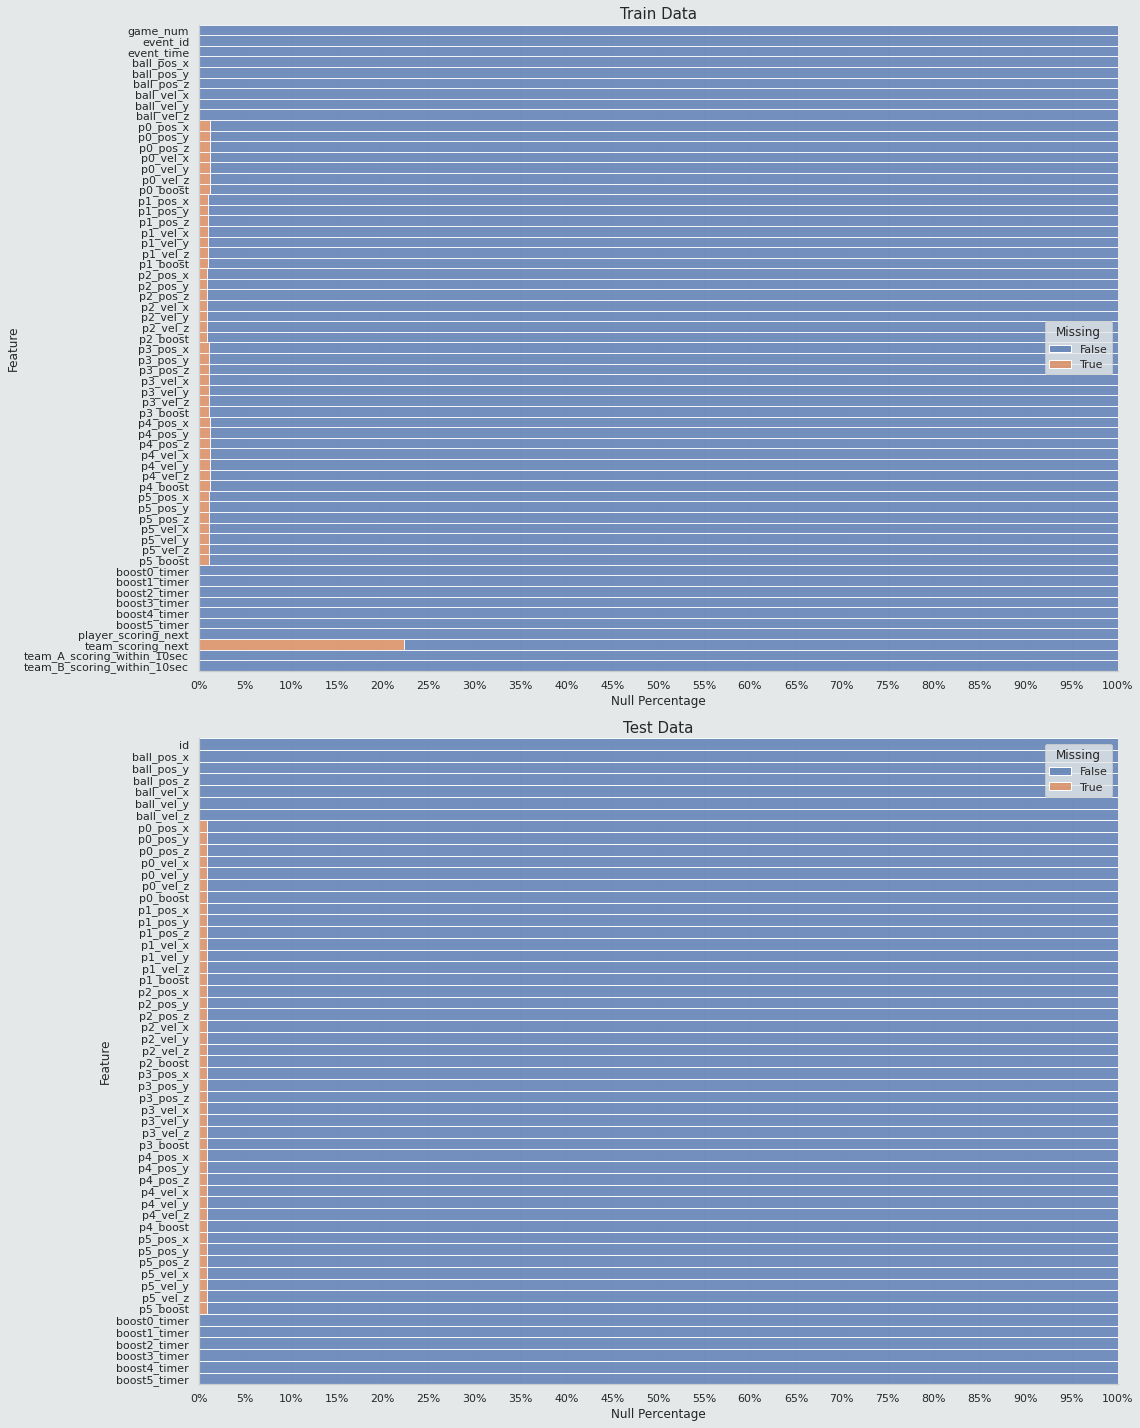

In [24]:
# Define data to display
data_to_display = {
    'Train Data': train_data,
    'Test Data': test_data
}

# Create figure
figure = plt.figure(tight_layout=True, figsize=(16, 20))

# Define figure's subplots
grid_spec = GridSpec(len(data_to_display), 1)

# Fetch data to plot
for row, (name, dataframe) in enumerate(data_to_display.items()):
    
    # Create subplot
    ax = figure.add_subplot(grid_spec[row, 0])
    
    sns.histplot(data=dataframe.isna().melt(var_name='Feature', value_name='Missing'), 
                 y='Feature', 
                 hue='Missing', 
                 multiple='fill',
                 ax=ax)
    
    # Refactor x label as missing percentage
    ax.xaxis.set_major_locator(ticker.LinearLocator(21))
    ax.xaxis.set_major_formatter('{:.0%}'.format)
    
    # Set title and label
    ax.set_title(name, fontsize=15)
    ax.set_xlabel('Null Percentage')